### Elementy sztucznej inteligencji
# Projekt: Binarne Drzewa Decyzyjne
autorzy:
1. Arkadiusz Florek
2. Maciej Komosa
3. Albert Pieniądz
4. Jakub Zięba

## TODO: Id3, opis jak działa drzewo
### błędy:
1. dane nie są formatowane jak dane w przykładzie w linku (na dole)
2. prawdopodobniej ostatecznie trzeba będzie usunąć klasę, bo trzeba było to zrobic w skrypcie, ale w klasie lepiej widać co jest grane
### możliwe rozwiązania: zastosować formatowanie z maila od prof'a albo jakieś prostsze

In [110]:
import numpy as np, pandas as pd

Obliczanie entropii

In [111]:
from math import log2

def _entropia(dane):
        # Tworzymy słownik, w którym kluczem jest wartość, a wartością liczba wystąpień tej wartości
        slownik = {}
        for _ in dane:
            atr = _[-1]
            if atr not in slownik:
                slownik[atr] = 0
            slownik[atr] += 1
    
        # Obliczamy entropię dla danej tabeli ze wzoru
        entropia = 0.0
        for _ in slownik.values():
            p = _ / len(dane)
            entropia -= p * log2(p)
    
        return entropia

Obliczanie zysku informacji

In [112]:
def _zysk_informacji(dane, przeslanka):
        # Tworzymy słownik, w którym kluczem jest wartość, a wartością lista wierszy z tą wartością
        slownik = {}
        for _ in dane:
            wartosc = _[przeslanka]
            if wartosc not in slownik:
                slownik[wartosc] = []
            slownik[wartosc].append(_)
    
        # Obliczamy entropię dla każdego podziału i sumujemy, aby uzyskać entropię po podziale
        ilosc_wierszy = len(dane)
        entropie = []
        for wartosci_przeslanki in slownik.values():
            ilosc_wartosci_przeslanki = len(wartosci_przeslanki)
            entropia_przeslanki = _entropia(wartosci_przeslanki)
            entropie.append((ilosc_wartosci_przeslanki / ilosc_wierszy) * entropia_przeslanki)
        entropia_przeslanki = sum(entropie)
    
        # Obliczamy przyrost informacji
        zysk = _entropia(dane) - entropia_przeslanki
    
        return zysk

Obliczanie przeslanki o najwiekszym zysku

In [113]:
def _przeslanka_o_najwiekszym_zysku(dane, nazwy_przeslanek, przeslanki_indeksy):
        
        # tabela przeslanek, czyli tabela o wartosciach
        # z zakresu dlugosci jednego wiersza odjąć konkluzję

        entropie_przeslanek = [_zysk_informacji(dane, przeslanka) for przeslanka in przeslanki_indeksy]
        indeks_przeslanka_o_najwiekszym_zysku = przeslanki_indeksy[entropie_przeslanek.index(max(entropie_przeslanek))]

        return nazwy_przeslanek[indeks_przeslanka_o_najwiekszym_zysku], indeks_przeslanka_o_najwiekszym_zysku

Algorytm id3

In [161]:
def _id3(dane, atrybuty):
        wezel = []  # inicjalizacja wezla
        (unique, counts) = np.unique(dane[:, -1], return_counts=True)
        slownik = dict(zip(unique, counts))
        for wartosc in slownik:
            if slownik[wartosc] == len(dane):
                wezel.append(wartosc)
                return wezel
        if len(atrybuty) == 0:
                wezel.append(max(slownik, key=slownik.get))
                return wezel
        przeslanka, indeks_przeslanka = _przeslanka_o_najwiekszym_zysku(dane, atrybuty, range(len(atrybuty)))
        wezel.append(przeslanka)
        atrybuty = np.delete(atrybuty, indeks_przeslanka)
        for wartosc in np.unique(dane[:, indeks_przeslanka]):
                podzbior = dane[dane[:, indeks_przeslanka] == wartosc]
                podzbior = np.delete(podzbior, indeks_przeslanka, axis=1)
                wezel.append([wartosc, _id3(podzbior, atrybuty)])

        return wezel

Graf

In [245]:
from graphviz import Digraph

def _rysuj_drzewo(drzewo, graf=None, i=0, s = ""):
        if graf is None:
                graf = Digraph()
        if i == 0:
                graf.node(s + str(i), drzewo[0])
        
        print(drzewo)
        #rozgalezienia
        if isinstance(drzewo, str):
                graf.node(s + str(i), drzewo)
                graf.edge(s + str(i-1), s + str(i))
                return graf
        #galezie
        for j in range(1, len(drzewo)):
                graf.node(s + str(i) + str(j), drzewo[j][1][0])
                graf.edge(s + str(i), s + str(i) + str(j), label=drzewo[j][0])
                _rysuj_drzewo(drzewo[j][1], graf, j, s + str(i))
                
        return graf


Zadanie

['typ treningu', ['rekreacyjny', ['miejsce zamieszkania', ['miasto', ['czestotliwosc/tydz', ['3-5', ['poziom zaawansowania', ['amator', ['5']], ['poczatkujacy', ['5']], ['zaawansowany', ['towarzystwo', ['indywidualnie', ['6']], ['w grupie', ['4']], ['w parze', ['4']]]]]], ['<2', ['poziom zaawansowania', ['amator', ['6']], ['poczatkujacy', ['towarzystwo', ['indywidualnie', ['6']], ['w grupie', ['4']], ['w parze', ['6']]]], ['zaawansowany', ['towarzystwo', ['indywidualnie', ['6']], ['w grupie', ['4']], ['w parze', ['4']]]]]], ['>5', ['poziom zaawansowania', ['amator', ['5']], ['poczatkujacy', ['towarzystwo', ['indywidualnie', ['5']], ['w grupie', ['6']], ['w parze', ['5']]]], ['zaawansowany', ['towarzystwo', ['indywidualnie', ['4']], ['w grupie', ['4']], ['w parze', ['5']]]]]]]], ['wies', ['czestotliwosc/tydz', ['3-5', ['towarzystwo', ['indywidualnie', ['1']], ['w grupie', ['1']], ['w parze', ['2']]]], ['<2', ['towarzystwo', ['indywidualnie', ['1']], ['w grupie', ['1']], ['w parze', ['2'

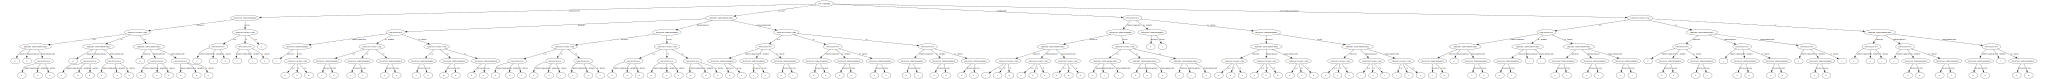

In [246]:
dane = pd.read_csv("sport.csv", header=None).to_numpy()
drzewo = _id3(dane[1:, :], dane[0, :-1])
print(drzewo)
_rysuj_drzewo(drzewo)